In [1]:
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import numpy as np
import math, warnings

## Import helpers from hw 1
[see source](../hw1/homework-1-2.ipynb)

In [13]:
def compute_bond_length(coord1, coord2):
    """
    Computes the bond length between two atoms.

    Parameters:
        coord1: 1D array-like, cartesian coordinates of the first atom in angstroms
        coord2: 1D array-like, cartesian coordinates of the second atom in angstroms, must be of the same length as coord1
        
    Returns:
        The Euclidean distance between coord1 and coord2
    """
    d = math.sqrt(sum([(comp1-comp2)**2 for comp1, comp2 in zip(coord1, coord2)]))
    if (d >= 2):
        warnings.warn(f"The bond length of {d} angstroms is atypical for a covalent bond.")
    return d

def compute_bond_angle(coord1, coord2, coord3, classify=True):
    """
    Computes the bond angle between three atoms.
    coord1 -- coord2
                   |_\\
                      \\
                        coord3

    Parameters:
        coord1, coord2, coord3 must be of the same length
        coord1: 1D array-like, cartesian coordinates of the first atom in angstroms
        coord2: 1D array-like, cartesian coordinates of the second atom in angstroms
        coord3: 1D array-like, cartesian coordinates of the third atom in angstroms
        classify = True: if set to True, prints the angle and classify it as acute, right or obtuse
    Returns:
        The Euclidean distance between coord1 and coord2
    """
    # put into arrays
    A = np.array(coord1)
    B = np.array(coord2)
    C = np.array(coord3)
    # calculate vectors
    vec1 = A - B
    vec2 = C - B
    
    numer = np.dot(vec1, vec2) # dot product
    denom = np.linalg.norm(vec1) * np.linalg.norm(vec2) # norms multiplied
    theta_rad = math.acos(numer / denom) # get theta in radians
    theta_deg = theta_rad * 180 / math.pi # convert to degrees
    if classify:
        if theta_deg < 90:
            print(f"Acute angle of {theta_deg:.2f}")
        elif theta_deg > 90:
            print(f"Obtuse angle of {theta_deg:.2f}")
        else:
            print(f"Right angle of {theta_deg:.2f}")
    return theta_deg

# Argon Dimer

## Lennard-Jones Potential
$$ V(r) = 4\epsilon \left[ (\frac{\sigma}{r})^{12} - (\frac{\sigma}{r})^{6} \right] $$

In [2]:
def lennard_jones(r, epsilon=0.01, sigma=3.4):
    """
    Calculates the Lennard_Jones potential.

    Parameters:
        r (angstrom): interatomic distance
        epsilon (eV): depth of the potential well (minimum energy)
        sigma (angstrom): zero potential distance

    Returns:
        Lennard_Jones potential
    """
    V = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
    return V

## Optimize the geometry of Ar$_2$

In [3]:
guess = 4

In [4]:
Vmin = minimize(
    lennard_jones,
    guess,
    method="Nelder-Mead",
    tol=1e-6
)

In [30]:
r = Vmin['x'][0]
r

np.float64(3.816371154785156)

## Plot

In [6]:
x = np.linspace(3, 6, 500)
y = lennard_jones(x)

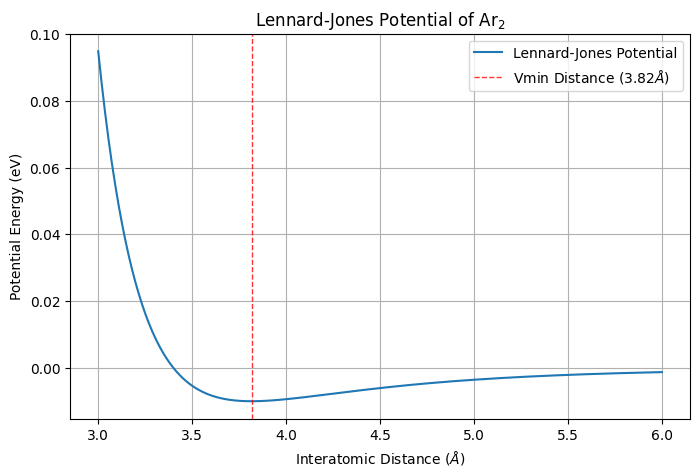

In [32]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(x, y, label="Lennard-Jones Potential")
ax.axvline(x = r, linestyle='--', linewidth=1, color='r', alpha=0.8, label=rf"Vmin Distance ({r:.2f}$\AA$)")
ax.set_xlabel(r'Interatomic Distance ($\AA$)')
ax.set_ylabel('Potential Energy (eV)')
ax.set_title("Lennard-Jones Potential of Ar$_2$")
ax.grid()
ax.legend()

fig.savefig('homework-2-1/argon_dimer_potential_vs_distance.png', dpi=200, bbox_inches='tight')

## Report 

In [38]:
print(f"Optimized atomic distances: r = {r:.2f}")

r = 3.82


In [26]:
# storing geometry
# Assume y=z=0
geometry = f"""2
Argon dimer
Ar\t{0:.6f}\t{0:.6f}\t{0:.6f}
Ar\t{Vmin['x'][0]:.6f}\t{0:.6f}\t{0:.6f}
"""

with open('homework-2-1/argon_dimer.xyz', 'w') as file:
    file.write(geometry)

# Argon Trimer

## Optimize the geometry of Ar$_3$

In [9]:
def potential_Ar3(r12, x3, y3):
    """
    Calculates the total potential energy of three Ar atoms using the Lennard-Jones potential.
        Atom 3 (x3, y3)
        /    \\
       /      \\
    Atom 1 -- Atom 2
    (0, 0)    (r12, 0)
    
    Parameters:
        r12 (angstrom): distance of Atom 2 from Atom 1
        x3 (angstrom): x coordinate of Atom 3
        y3 (angstrom): y coordinate of Atom 3

    Returns:
        Total potential energy (eV) of Ar3
    """
    # calculate atom distances
    r13 = np.sqrt(x3**2 + y3**2)
    r23 = np.sqrt((r12 - x3)**2 + y3**2)
    # potential energies
    V12 = lennard_jones(r12)
    V13 = lennard_jones(r13)
    V23 = lennard_jones(r23)

    return V12 + V13 + V23

In [10]:
guess = 4

In [11]:
rmin = minimize(
    lambda x_arr: potential_Ar3(x_arr[0], x_arr[1], x_arr[2]), # convert array input into separate argument input
    [guess, guess, guess],
    method = "Nelder-Mead",
    tol = 1e-6
)['x']

In [12]:
r12, x3, y3 = rmin

## Report the Optimal Geometry

In [14]:
# coordinates of each Ar atom
Ar1 = [0, 0]
Ar2 = [r12, 0]
Ar3 = [x3, y3]

In [15]:
# bond lengths
r13 = compute_bond_length(Ar1, Ar3)
r23 = compute_bond_length(Ar2, Ar3)

C:\Users\repti\AppData\Local\Temp\ipykernel_3196\1237173699.py:14: UserWarning: The bond length of 3.8163705635800507 angstroms is atypical for a covalent bond.
  warnings.warn(f"The bond length of {d} angstroms is atypical for a covalent bond.")
C:\Users\repti\AppData\Local\Temp\ipykernel_3196\1237173699.py:14: UserWarning: The bond length of 3.8163708922314643 angstroms is atypical for a covalent bond.
  warnings.warn(f"The bond length of {d} angstroms is atypical for a covalent bond.")


In [16]:
# bond angles
angle_vertex_2 = compute_bond_angle(Ar1, Ar2, Ar3)
angle_vertex_1 = compute_bond_angle(Ar2, Ar1, Ar3)
angle_vertex_3 = compute_bond_angle(Ar1, Ar3, Ar2)

Acute angle of 60.00
Acute angle of 60.00
Acute angle of 60.00


In [17]:
print(f"Optimized atomic distances: r12 = {r12:.2f}, r13 = {r13:.2f}, r23 = {r23:.2f}")

r12 = 3.82, r13 = 3.82, r23 = 3.82


In [18]:
print(f"Optimized atomic angles: {angle_vertex_1:.2f} with Ar1 as vertex, {angle_vertex_2:.2f} with Ar2 as vertex, {angle_vertex_3:.2f} with Ar3 as vertex")

Ar-Ar-Ar bond angles: 60.00 with Ar1 as vertex, 60.00 with Ar2 as vertex, 60.00 with Ar3 as vertex


In [27]:
# storing geometry
# Assume z=0
geometry = f"""3
Argon trimer
Ar\t{0:.6f}\t{0:.6f}\t{0:.6f}
Ar\t{r12:.6f}\t{0:.6f}\t{0:.6f}
Ar\t{x3:.6f}\t{y3:.6f}\t{0:.6f}
"""

with open('homework-2-1/argon_trimer.xyz', 'w') as file:
    file.write(geometry)

The argon atoms form an equilateral triangle with side lengths of 3.82 Å and angles of 60 $^{\circ}$. This is expected, since if, for example, Ar$_1$ reaches an energy minimum with respect to the other two atoms, this same configuration should also put Ar$_2$ and Ar$_3$ into their energy minima. This leads to the result that all three atoms must be in identical environments with respect to their neighbors, which must be an equilateral triangle. Each side is the same length as the minimum energy distance for Ar$_2$, which also makes sense.